# Simulation 2.5 MeV events Direct to -z

In [9]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
from mpl_toolkits import mplot3d
from numpy import array, where, shape, reshape
np.set_printoptions(threshold=1000)

In [10]:
def magnitude(vector): 
    return np.sqrt(sum(pow(element, 2) for element in vector))

# 1 - Load and explore File

In [11]:
file = uproot.open("/snoplus simulations/electron bulk/center point/simu_Analysis_elec_z_2.5MeV.root")
type(file)

uproot.reading.ReadOnlyDirectory

In [12]:
branches = file.keys()
branches

['T;1', 'pmt;2', 'pmt;1']

In [13]:
data1 = file['T;1']
data1.keys()

['evtid',
 'mcID',
 'energy',
 'mc_position',
 'mc_momentum',
 'position',
 'momentum',
 'hit_pmtid',
 'hit_pmttime',
 'hit_residual',
 'hit_type']

In [22]:
evtid = np.array(data1['evtid'])
mcID = np.array(data1['mcID'])
energy = np.array(data1['energy'])
mc_position = np.array(data1['mc_position'])
position = np.array(data1['position'])
hit_pmtid = np.array(data1['hit_pmtid'])
hit_pmttime = np.array(data1['hit_pmttime'])
hit_residual = np.array(data1['hit_residual'])
hit_type = np.array(data1['hit_type'])

In [15]:
energy

array([-1610612736, -1610612736, -1610612736, ..., -2147483648,
       -2147483648, -2147483648])

In [18]:
len(mcID)

722982

In [29]:
# Prueba de estructura de data (DS) dividida. Si hace print ('here') significa que el DS esta dividido

for i in range(len(evtid)-1):
    if evtid[i+1] < evtid[i]:
        print('here')

In [12]:
hit_pmtid

array([8711, 3750, 6745, ..., 8587, 4832, 9207])

In [31]:
# Prueba de estructura de data (DS) dividida. Si hace print ('here') significa que el DS esta dividido
counter = 0
for i in range(len(evtid)-1):
    if evtid[i+1] < evtid[i]:
        counter += counter

### Extract PMT info.
PMT info. is relative to its standar positions, identificators, etc. They dont correspond to hits of events!

In [14]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [16]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

In [17]:
len(pmt_pos_xyz)

9728

## 1.1 Time residuals

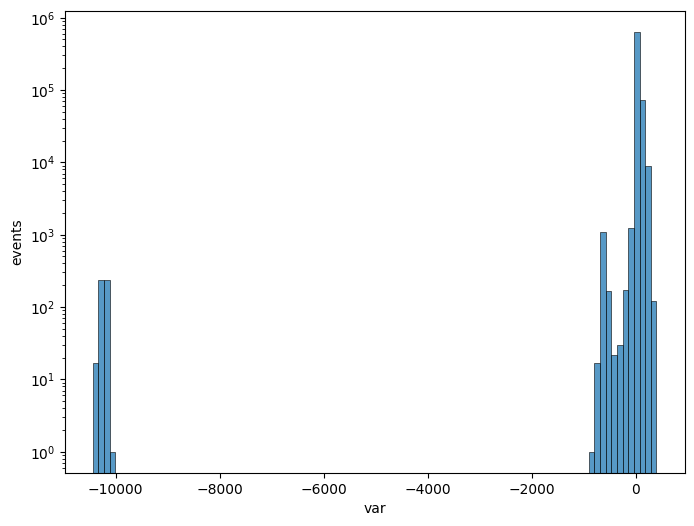

In [18]:
var = hit_residual

plt.figure(figsize=(8,6))
sn.histplot(var, bins = 100)
plt.xlabel('var')
plt.ylabel('events')
plt.yscale('log')

## 1.2 Verify if vertex generation is at the center

In [19]:
mc_position

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
position

array([[ -207.23303223,   112.47331238,   -98.40438843],
       [ -207.23303223,   112.47331238,   -98.40438843],
       [ -207.23303223,   112.47331238,   -98.40438843],
       ...,
       [-4600.47460938, -1054.63195801,  -366.83874512],
       [-4600.47460938, -1054.63195801,  -366.83874512],
       [-4600.47460938, -1054.63195801,  -366.83874512]])

## 1.2 Check one event ID

### 1.2.1 Extract Data to be Observed

In [107]:
ev_ID = 1
condition = (mcID == ev_ID)

pmtid_ev = np.extract(condition, hit_pmtid)
time_res_ev = np.extract(condition, hit_residual)
hit_type_ev = np.extract(condition, hit_type)

In [108]:
hit_type_ev

array([2, 1, 1, ..., 2, 2, 2])

### 1.2.2 Choose the PMT type = 1 Data

In [128]:
valid_type = 1    #type of PMT
valid_pmt_id = [] # list of valid IDs in the PMT info

valid_info_pmt_i = where(pmt_type == valid_type)[0]

for i in valid_info_pmt_i:
    valid_pmt_id.append(pmt_id[i])

#Now, compare with the PMT ids of the event and extract valid info from event
valid_pmtid_ev = []
valid_time_res_ev = []
valid_hit_type_ev = []
xyz_pmt = []
sph_pmt = []

valid_id_info_ev_i = where(np.in1d(pmtid_ev,valid_pmt_id))[0]  #index of PMT ids valid given the valid_pmt_id for PMTtype = 1

for j in valid_id_info_ev_i:
    valid_pmtid_ev.append(pmtid_ev[j])
    valid_time_res_ev.append(time_res_ev[j])
    valid_hit_type_ev.append(hit_type_ev[j])

for coord_i in valid_pmtid_ev:
    xyz_pmt.append(pmt_pos_xyz[coord_i])
    sph_pmt.append(pmt_pos_sph[coord_i])

In [150]:
valid_pmtid_ev

[6721,
 2131,
 2080,
 5225,
 4665,
 7675,
 7217,
 7259,
 3625,
 6681,
 7982,
 4732,
 7729,
 4185,
 5660,
 7204,
 4107,
 7573,
 7206,
 2607,
 7327,
 8361,
 8384,
 8766,
 6583,
 6028,
 5279,
 134,
 7260,
 5540,
 8225,
 8808,
 5170,
 3148,
 5740,
 528,
 1093,
 7339,
 4624,
 5517,
 8214,
 5318,
 6053,
 6815,
 4141,
 4197,
 4579,
 1929,
 7674,
 284,
 8716,
 2651,
 4506,
 8428,
 7201,
 7346,
 8545,
 5319,
 9039,
 5539,
 1134,
 7051,
 7017,
 7806,
 1175,
 4758,
 4422,
 4199,
 8219,
 3484,
 4113,
 2056,
 5600,
 8763,
 2730,
 3092,
 442,
 3677,
 6806,
 2613,
 6232,
 1006,
 4715,
 541,
 5497,
 807,
 7892,
 4311,
 1497,
 1625,
 1403,
 5667,
 3085,
 8508,
 3297,
 3018,
 4708,
 7432,
 1863,
 6456,
 5929,
 1902,
 1803,
 4472,
 1063,
 5918,
 6170,
 903,
 6793,
 5801,
 8835,
 354,
 8056,
 4912,
 7038,
 2658,
 5047,
 4458,
 8155,
 3122,
 7750,
 2997,
 6316,
 6036,
 764,
 1036,
 3225,
 4946,
 8859,
 3513,
 3182,
 4516,
 2713,
 3231,
 1993,
 44,
 493,
 3146,
 1061,
 1574,
 3699,
 5374,
 8366,
 4218,
 601

## 1.2.3 Observe Time Residual

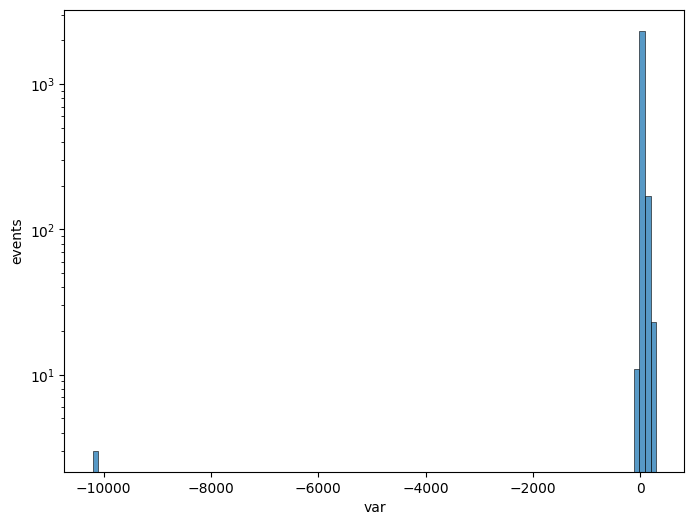

In [110]:
plt.figure(figsize=(8,6))
sn.histplot(valid_time_res_ev, bins = 100)
plt.xlabel('var')
plt.ylabel('events')
plt.yscale('log')

## 1.3 Separate hit_type for one evID

In [135]:
# To observe:
pmt_xyz_hit_1_ID = []
pmt_xyz_hit_2_ID = []

pmt_sph_hit_1_ID = []
pmt_sph_hit_2_ID = []

time_residual_hit1_ID = []							#Time residual of hit type = 1
time_residual_hit2_ID = []							#Time residual of hit type = 2

hitpmt_ID_hit_1_ID = []							#ID of pmt giving hit type = 1
hitpmt_ID_hit_2_ID = []


#condition_1 = (valid_hit_type_ev == 1)
#condition_2 = (valid_hit_type_ev == 2)

index_hit_1 = where(np.in1d(valid_hit_type_ev, [1]))[0]
index_hit_2 = where(np.in1d(valid_hit_type_ev, [2]))[0]

for (i,j) in zip(index_hit_1, index_hit_2):

    pmt_xyz_hit_1_ID.append(xyz_pmt[i])
    pmt_sph_hit_1_ID.append(sph_pmt[i])
    time_residual_hit1_ID.append(valid_time_res_ev[i])
    hitpmt_ID_hit_1_ID.append(valid_pmtid_ev[i])

    pmt_xyz_hit_2_ID.append(xyz_pmt[j])
    pmt_sph_hit_2_ID.append(sph_pmt[j])
    time_residual_hit2_ID.append(valid_time_res_ev[j])
    hitpmt_ID_hit_2_ID.append(valid_pmtid_ev[j])


In [180]:
xyz = []
xyz.append(xyz_pmt)

In [181]:
shape(xyz)

(1, 2541, 3)